In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
#loading the dataset
df=pd.read_csv("/content/Company_Data.csv")

In [257]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [258]:
#EDA
df["Sales"].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [259]:
#finding null values
df.isna().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [261]:
#converting the sale column values into categorical values

In [262]:
quartiles = df['Sales'].quantile([0, 0.25, 0.5, 0.75, 1])


In [263]:
#creating function to categorize values

In [264]:
def categorize_sales(sale_value):
    if sale_value <= quartiles[0.25]:
        return "Low"
    elif sale_value <= quartiles[0.5]:
        return "Medium"
    else:
        return "High"

In [265]:
df['SaleCategory'] = df['Sales'].apply(categorize_sales)

In [266]:
df.drop(columns=["Sales"],inplace=True)

In [267]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SaleCategory
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [268]:
#encoding the dependent and required independent variables

In [269]:
from sklearn.preprocessing import LabelEncoder

In [270]:
le= LabelEncoder()

In [271]:
df["SaleCategory"]=le.fit_transform(df["SaleCategory"])

In [272]:
df.drop(columns=["ShelveLoc","Urban","US"],axis=1,inplace=True)

In [273]:
df

,CompPrice,Income,Advertising,Population,Price,Age,Education,SaleCategory
0,138,73,11,276,120,42,17,0
1,111,48,16,260,83,65,10,0
2,113,35,10,269,80,59,12,0
3,117,100,4,466,97,55,14,2
4,141,64,3,340,128,38,13,1
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0
396,139,23,3,37,120,55,11,2
397,162,26,12,368,159,40,18,2
398,100,79,7,284,95,50,12,2


In [274]:
# independent and dependent variables

In [275]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [276]:
#scaling the dataset x
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit_transform(x)

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  0.17782345,
        -0.69978222,  1.18444912],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.38685375,
         0.72172284, -1.4901134 ],
       [-0.78189624, -1.20415947,  0.506621  , ..., -1.51371947,
         0.35089544, -0.72595268],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.82707779,
        -0.82339136,  1.56652948],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.87939087,
        -0.20534568, -0.72595268],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.17782345,
        -0.26715025,  0.80236876]])

In [277]:
print(x)


     CompPrice  Income  Advertising  Population  Price  Age  Education
0          138      73           11         276    120   42         17
1          111      48           16         260     83   65         10
2          113      35           10         269     80   59         12
3          117     100            4         466     97   55         14
4          141      64            3         340    128   38         13
..         ...     ...          ...         ...    ...  ...        ...
395        138     108           17         203    128   33         14
396        139      23            3          37    120   55         11
397        162      26           12         368    159   40         18
398        100      79            7         284     95   50         12
399        134      37            0          27    120   49         16

[400 rows x 7 columns]


In [278]:
#spliting into train and test

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=40)

In [281]:
print(xtrain)

     CompPrice  Income  Advertising  Population  Price  Age  Education
389        128      42            8         328    107   35         12
21         134      29           12         239    109   62         18
142        124      84            0         300    104   77         15
163        130      64            0          40    106   39         17
382        121      28           19         315    121   66         14
..         ...     ...          ...         ...    ...  ...        ...
306        131      32            1          85    133   48         12
165        147      58            7         100    191   27         15
7          136      81           15         425    120   67         10
219        116      79           19         359    116   58         17
326        133      30            0         152    122   53         17

[280 rows x 7 columns]


In [282]:

#installing the model
from sklearn.tree import DecisionTreeClassifier

In [283]:
#initializing
DT=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [284]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [285]:

ypred=DT.predict(xtest)

In [286]:
ypred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [287]:


#importing classificationj report for better understanding

In [288]:
from sklearn.metrics import classification_report

In [289]:
classification_report(ytest,ypred)

'              precision    recall  f1-score   support\n\n           0       0.59      0.79      0.67        52\n           1       0.48      0.59      0.53        34\n           2       0.12      0.03      0.05        34\n\n    accuracy                           0.52       120\n   macro avg       0.40      0.47      0.42       120\nweighted avg       0.42      0.52      0.45       120\n'

In [290]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.59      0.79      0.67        52
           1       0.48      0.59      0.53        34
           2       0.12      0.03      0.05        34

    accuracy                           0.52       120
   macro avg       0.40      0.47      0.42       120
weighted avg       0.42      0.52      0.45       120



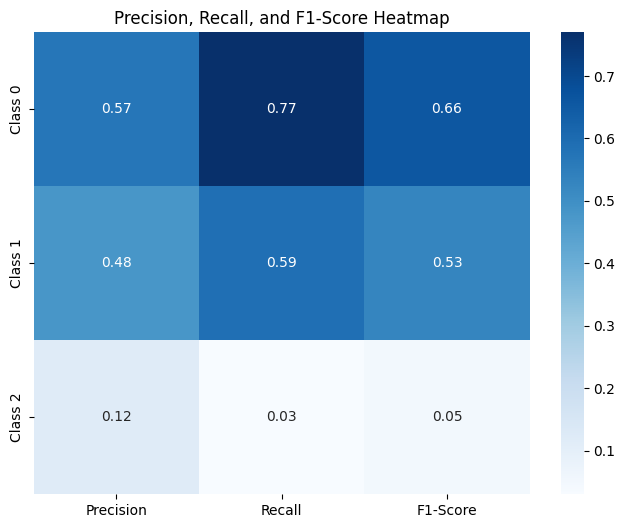

In [291]:
# Precision, recall, and F1-score values from the classification report
precision = [0.57, 0.48, 0.12]
recall = [0.77, 0.59, 0.03]
f1_score = [0.66, 0.53, 0.05]

# Create a metrics DataFrame
data = {'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}
df_metrics = pd.DataFrame(data, index=['Class 0', 'Class 1', 'Class 2'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_metrics, annot=True, cmap='Blues', fmt=".2f")
plt.title('Precision, Recall, and F1-Score Heatmap')
plt.show()

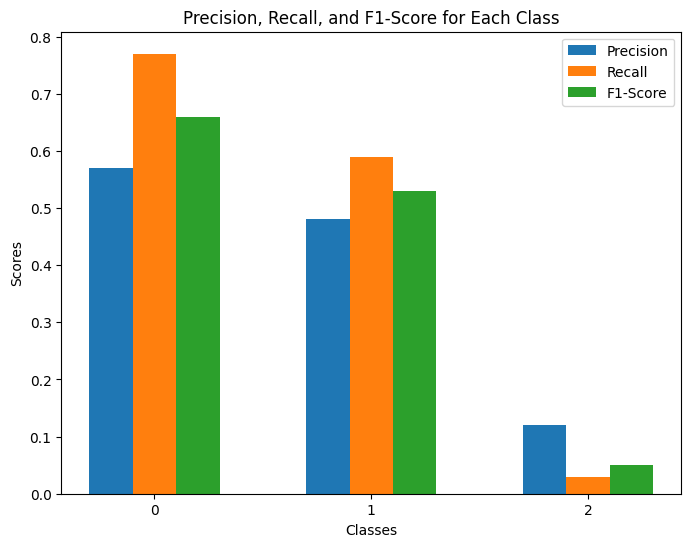

In [292]:
#visualization

# Precision, recall, and F1-score values from the classification report
precision =  [0.57, 0.48, 0.12]
recall = [0.77, 0.59, 0.03]
f1_score = [0.66, 0.53, 0.05]
classes = [0, 1, 2]
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(np.array(classes) - width, precision, width, label='Precision')
bar2 = ax.bar(np.array(classes), recall, width, label='Recall')
bar3 = ax.bar(np.array(classes) + width, f1_score, width, label='F1-Score')

ax.set_xticks(classes)
ax.set_xticklabels(classes)
ax.legend()

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Each Class')

plt.show()

In [293]:
DT.score(xtrain,ytrain)

0.7

In [294]:
from sklearn import tree

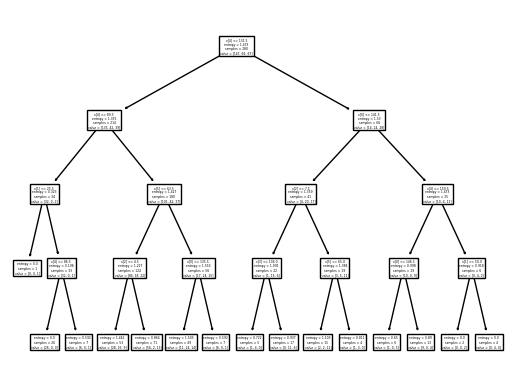

In [295]:
tree.plot_tree(DT)
plt.show()

In [296]:
f= x.columns

In [297]:
f

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education'],
      dtype='object')

In [298]:
n=["high","medium","low"]

In [299]:
n

['high', 'medium', 'low']

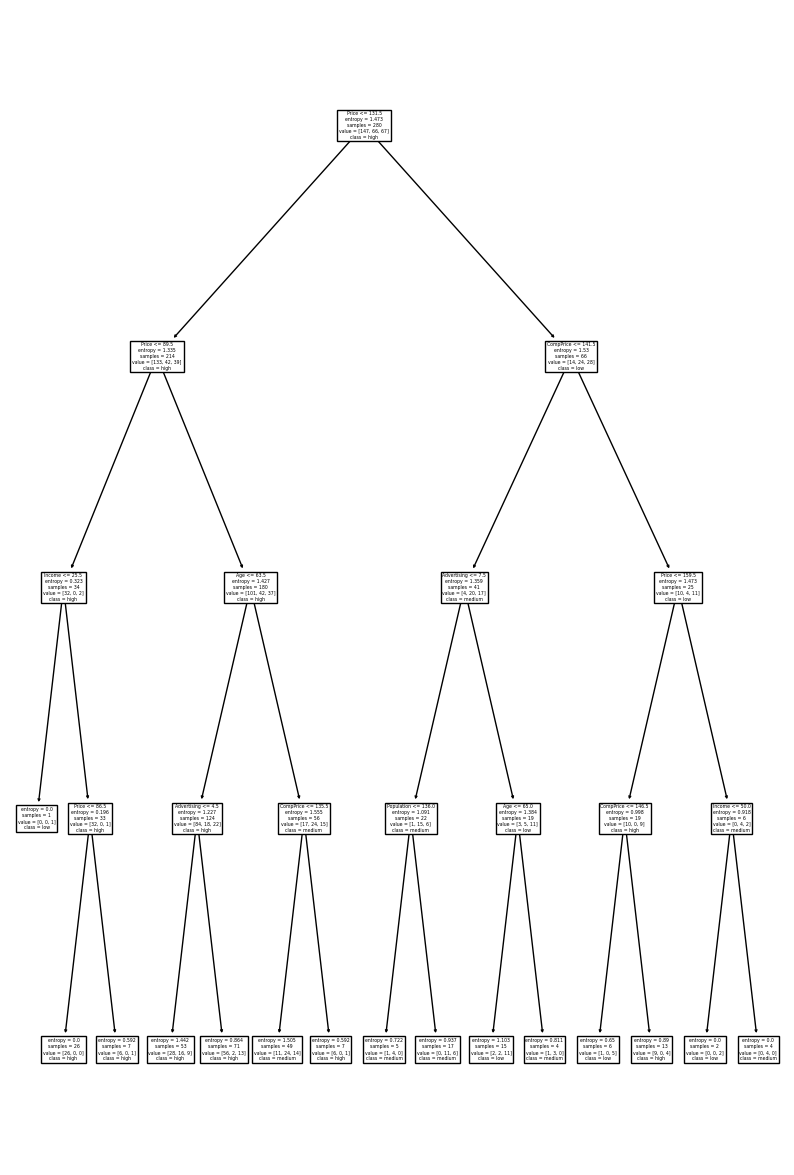

In [300]:
plt.figure(figsize=(10,15))
tree.plot_tree(DT,feature_names=f,class_names=n)
plt.show()

FRAUD_CHECK DATASET

In [301]:
#loading the dataset
df1=pd.read_csv("/content/Fraud_check.csv")

In [302]:
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [303]:
#EDA

In [304]:
#finding null values
df1.isna()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [305]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [306]:
#categorizing the taxable.income column using if else function
def classify_income(Income):
    if Income <= 30000:
        print("Risky")
    else:
        print("Good")
df1["taxable.income"]=df1["Taxable.Income"].apply(classify_income)

Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Risky
Good
Good
Good
Risky
Good
Good
Risky
Good
Risky
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Good
Good
Risky
Good
Risky
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Good
Risky
Good
Risky
Good
Good
Risky
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Good
Good
Risky
Good
Risky
Good
Risky
Good
Good
Good
Risky
Risky
Good
Risky
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Risky
Good
Good
Good
Risky
Good
Good
Good
Risky
Good
Good
Risky
Risky
Risky
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Risky
Good
Good
Risky
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Risky
Risky
Good
Good
Good
Risky
Good
Good
Good
Good
Risky
Good
Good
Good
Good
Risky
Good
Good
Risky
Risky
Good
Good
Good
Good
Good
Good
Risky
Good
Risky
Risky
Good
Good
Good
Good
Good
Risky
Good
Goo

In [307]:
#categorizing the taxable.income column into risky and good
def income(n):
    if n <= 30000:
        return "Risky"
    else:
        return "Good"

df1['Taxable.Income.Class'] = df1['Taxable.Income'].apply(income)

In [308]:
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable.income,Taxable.Income.Class
0,NO,Single,68833,50047,10,YES,None,Good
1,YES,Divorced,33700,134075,18,YES,None,Good
2,NO,Married,36925,160205,30,YES,None,Good
3,YES,Single,50190,193264,15,YES,None,Good
4,NO,Married,81002,27533,28,NO,None,Good
...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,None,Good
596,YES,Divorced,69967,55369,2,YES,None,Good
597,NO,Divorced,47334,154058,0,YES,None,Good
598,YES,Married,98592,180083,17,NO,None,Good


In [309]:
#dropping the unnecessary columns
df1.drop(columns=["Taxable.Income"],inplace=True)

In [310]:
df1.drop(columns=["taxable.income"],inplace=True)

In [311]:
df1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income.Class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [312]:
#encoding using labelencoder
from sklearn.preprocessing import LabelEncoder

In [313]:
le=LabelEncoder()

In [314]:
df1["Undergrad"]=le.fit_transform(df1["Undergrad"])

In [315]:
df1["Marital.Status"]=le.fit_transform(df1["Marital.Status"])

In [316]:
df1["Urban"]=le.fit_transform(df1["Urban"])

In [317]:
df1["Taxable.Income.Class"]=le.fit_transform(df1["Taxable.Income.Class"])

In [318]:
df1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income.Class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


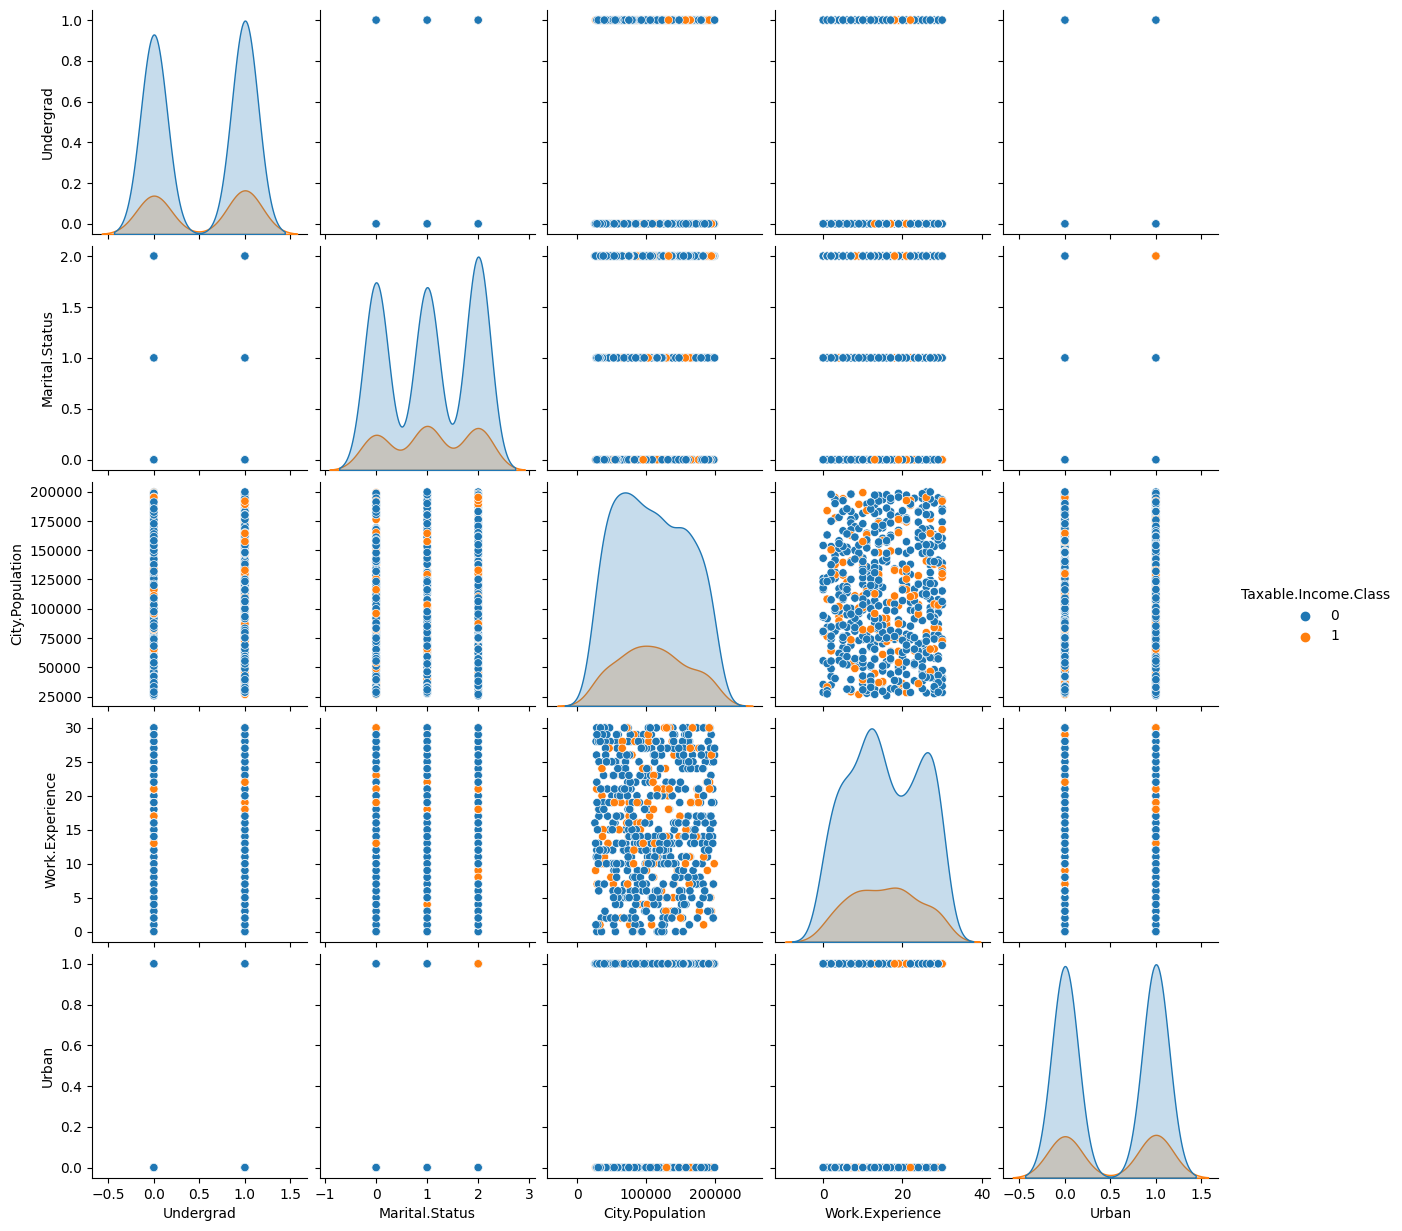

In [254]:
sns.pairplot(df1, hue='Taxable.Income.Class')
plt.show()

In [319]:
#independent and dependent

In [320]:
x1= df1.iloc[:,:-1]
y1= df1.iloc[:,-1]

In [321]:
y1

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income.Class, Length: 600, dtype: int64

In [322]:
x1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [323]:
from sklearn.model_selection import train_test_split

In [324]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2,random_state=40)

In [325]:
#calling the model
from sklearn.tree import DecisionTreeClassifier

In [326]:
model=DecisionTreeClassifier(criterion="gini",max_depth=3)

In [327]:
#fitting xtrain and ytrain to the model
model.fit(xtrain1,ytrain1)

DecisionTreeClassifier(max_depth=3)

In [328]:
ypred1= model.predict(xtest1)

In [329]:
from sklearn.metrics import classification_report

In [330]:
print(classification_report(ytest1,ypred1))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



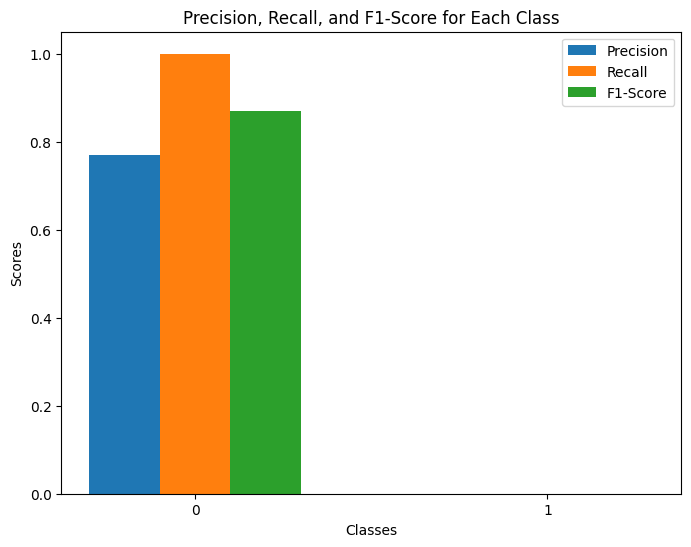

In [331]:
#visualization

# Precision, recall, and F1-score values from the classification report
precision = [0.77, 0.00]
recall = [1.00, 0.00]
f1_score = [0.87, 0.00]

classes = [0, 1]
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(np.array(classes) - width, precision, width, label='Precision')
bar2 = ax.bar(np.array(classes), recall, width, label='Recall')
bar3 = ax.bar(np.array(classes) + width, f1_score, width, label='F1-Score')

ax.set_xticks(classes)
ax.set_xticklabels(classes)
ax.legend()

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Each Class')

plt.show()

In [332]:
model.score(xtrain1,ytrain1)

0.80625

In [333]:
#creating another model

In [334]:
model2= DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [335]:
model2.fit(xtrain1,ytrain1)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [336]:
ypred2=model2.predict(xtest1)

In [337]:
print(classification_report(ytest1,ypred2))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


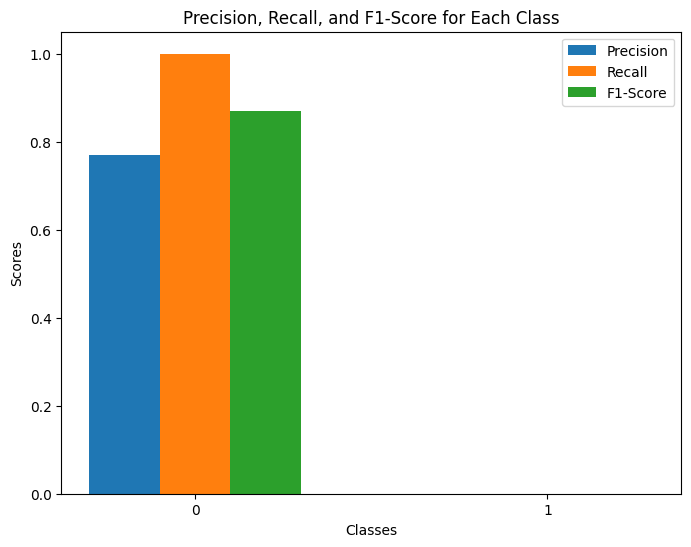

In [338]:
#visualization
precision = [0.77, 0.00]
recall = [1.00, 0.00]
f1_score = [0.87, 0.00]

classes = [0, 1]
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(np.array(classes) - width, precision, width, label='Precision')
bar2 = ax.bar(np.array(classes), recall, width, label='Recall')
bar3 = ax.bar(np.array(classes) + width, f1_score, width, label='F1-Score')

ax.set_xticks(classes)
ax.set_xticklabels(classes)
ax.legend()

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Each Class')

plt.show()

In [339]:
model.score(xtrain1,ytrain1)

0.80625

In [340]:
#visualization

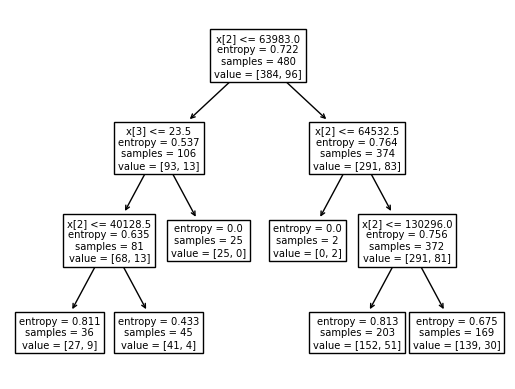

In [341]:
tree.plot_tree(model2)
plt.show()

In [342]:
fn=x1.columns

In [343]:
tn=["Risky","Good"]

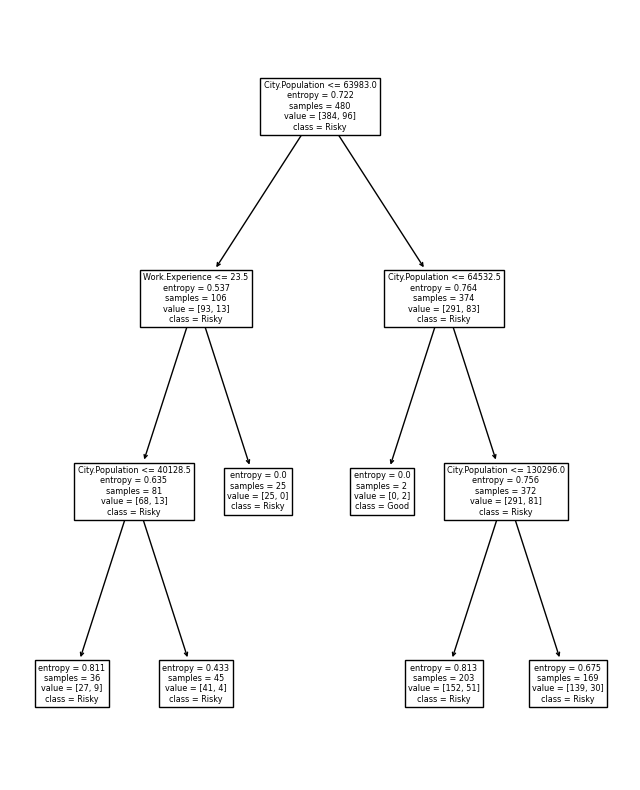

In [344]:
plt.figure(figsize=(8,10))
tree.plot_tree(model2,feature_names=fn,class_names=tn)
plt.show()

In [345]:
#so lets consider model2 as it has higher accuracy as compared with others